# Encoding categorical variable

Encoding categorical variable into numerical variables are important for buiilding a ML based model. Most of them can not handle cetegorical features in a right manner. 
categorical features can be of two types: 
- 1) Ordinal: there is some order observed in the values. (eg: good, better, best, worst)
- 2) Nominal: No order in particular (eg. cities, colors, names)

In this Notebook, I will be talking about the different ways through which you can transform categorical variables into numerical features:

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = {'temperature': ['hot', 'cold', 'very hot' , 'warm', 'hot', 'warm', 'warm', 'hot', 'hot', 'cold']
        , 'color': ['red', 'yellow', 'blue', 'blue', 'red', 'yellow', 'red', 'yellow', 'yellow', 'yellow']
        , 'target': [1,1,1,0,1,0,1,0,1,1]}
df = pd.DataFrame(data)

In [5]:
df

,temperature,color,target
0,hot,red,1
1,cold,yellow,1
2,very hot,blue,1
3,warm,blue,0
4,hot,red,1
5,warm,yellow,0
6,warm,red,1
7,hot,yellow,0
8,hot,yellow,1
9,cold,yellow,1


### 1. One hot encoding 

In this method, we map each category to a vector that contains 1 and 0, denoting the presence or absence of the feature. The number of vectors depends on the number of categories for features. This method produces many columns that slow down the learning significantly if the number of the category is very high for the feature.

In [6]:
#alternative to one hot encoder - get dummies
df1 = pd.DataFrame(df)
pd.get_dummies(df1, columns= ["temperature"])

,color,target,temperature_cold,temperature_hot,temperature_very hot,temperature_warm
0,red,1,0,1,0,0
1,yellow,1,1,0,0,0
2,blue,1,0,0,1,0
3,blue,0,0,0,0,1
4,red,1,0,1,0,0
5,yellow,0,0,0,0,1
6,red,1,0,0,0,1
7,yellow,0,0,1,0,0
8,yellow,1,0,1,0,0
9,yellow,1,1,0,0,0


In [8]:
import sklearn 
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()
ohf = ohe.fit_transform(df1.temperature.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohf, columns= ["Temp_"+str(ohe.categories_[0][i]) for i in range(len(ohe.categories_[0]))])
dfh = pd.concat([df1, dfOneHot], axis =1)
dfh

,temperature,color,target,Temp_cold,Temp_hot,Temp_very hot,Temp_warm
0,hot,red,1,0.0,1.0,0.0,0.0
1,cold,yellow,1,1.0,0.0,0.0,0.0
2,very hot,blue,1,0.0,0.0,1.0,0.0
3,warm,blue,0,0.0,0.0,0.0,1.0
4,hot,red,1,0.0,1.0,0.0,0.0
5,warm,yellow,0,0.0,0.0,0.0,1.0
6,warm,red,1,0.0,0.0,0.0,1.0
7,hot,yellow,0,0.0,1.0,0.0,0.0
8,hot,yellow,1,0.0,1.0,0.0,0.0
9,cold,yellow,1,1.0,0.0,0.0,0.0


One Hot Encoding is very popular. We can represent all categories by N-1 (N= No of Category) as sufficient to encode the one that is not included. Usually, for Regression, we use N-1 (drop first or last column of One Hot Coded new feature ). Still, for classification, the recommendation is to use all N columns without as most of the tree-based algorithm builds a tree based on all available variables. One hot encoding with N-1 binary variables should be used in linear Regression to ensure the correct number of degrees of freedom (N-1). The linear Regression has access to all of the features as it is being trained and therefore examines the whole set of dummy variables altogether. This means that N-1 binary variables give complete information about (represent completely) the original categorical variable to the linear Regression. This approach can be adopted for any machine learning algorithm that looks at ALL the features simultaneously during training—for example, support vector machines and neural networks as well as clustering algorithms.

We will never consider that additional label in tree-based methods if we drop. Thus, if we use the categorical variables in a tree-based learning algorithm, it is good practice to encode it into N binary variables and don’t drop.

### 2. Label Encoding

In this encoding, each category is assigned a value from 1 through N (where N is the number of categories for the feature. One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order or some relationship. In below example it may look like (Cold<Hot<Very Hot<Warm….0 < 1 < 2 < 3 ) .Scikit-learn code for the data-frame as follows:


In [10]:
from sklearn.preprocessing import LabelEncoder
df2 = pd.DataFrame(df)
df2["temp_label_encoded"] = LabelEncoder().fit_transform(df2.temperature)

In [12]:
df2

,temperature,color,target,temp_label_encoded
0,hot,red,1,1
1,cold,yellow,1,0
2,very hot,blue,1,2
3,warm,blue,0,3
4,hot,red,1,1
5,warm,yellow,0,3
6,warm,red,1,3
7,hot,yellow,0,1
8,hot,yellow,1,1
9,cold,yellow,1,0


In [13]:
#alternative - pandas factorize
df2.loc[:, 'temp_fac_encoded'] = pd.factorize(df2.temperature)[0].reshape(-1,1)

In [14]:
df2

,temperature,color,target,temp_label_encoded,temp_fac_encoded
0,hot,red,1,1,0
1,cold,yellow,1,0,1
2,very hot,blue,1,2,2
3,warm,blue,0,3,3
4,hot,red,1,1,0
5,warm,yellow,0,3,3
6,warm,red,1,3,3
7,hot,yellow,0,1,0
8,hot,yellow,1,1,0
9,cold,yellow,1,0,1


### 3. Ordinal Encoding 

We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable. This is reasonable only for ordinal variables, as I mentioned at the beginning of this article. This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether the variable is ordinal or not, and it will assign a sequence of integers

- as per the order of data (Pandas assigned Hot (0), Cold (1), “Very Hot” (2) and Warm (3)) or
- as per alphabetically sorted order (scikit-learn assigned Cold(0), Hot(1), “Very Hot” (2) and Warm (3)).

If we consider the temperature scale as the order, then the ordinal value should from cold to “Very Hot. “ Ordinal encoding will assign values as ( Cold(1) <Warm(2)<Hot(3)<”Very Hot(4)). Usually, Ordinal Encoding is done starting from 1.

In [15]:
df3 = pd.DataFrame(df)
temp_dict = {'cold':1,
    'warm':2,
    'hot':3,
    'very hot':4}

df3['temp_ordinal'] = df3.temperature.map(temp_dict)
df3

,temperature,color,target,temp_label_encoded,temp_fac_encoded,temp_ordinal
0,hot,red,1,1,0,3
1,cold,yellow,1,0,1,1
2,very hot,blue,1,2,2,4
3,warm,blue,0,3,3,2
4,hot,red,1,1,0,3
5,warm,yellow,0,3,3,2
6,warm,red,1,3,3,2
7,hot,yellow,0,1,0,3
8,hot,yellow,1,1,0,3
9,cold,yellow,1,0,1,1


### 4.Helmert Encoding

In this encoding, the mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels.
The version in category_encoders is sometimes referred to as Reverse Helmert Coding. The mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels. Hence, the name ‘reverse’ is used to differentiate from forward Helmert coding.

In [16]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [17]:
import category_encoders as ce

In [19]:
df4 = pd.DataFrame(df)


encoder = ce.HelmertEncoder(cols = ["temperature"])
dfh = encoder.fit_transform(df4["temperature"])
df4 = pd.concat([df4, dfh], axis = 1)
df4

,temperature,color,target,temp_label_encoded,temp_fac_encoded,temp_ordinal,intercept,temperature_0,temperature_1,temperature_2
0,hot,red,1,1,0,3,1,-1.0,-1.0,-1.0
1,cold,yellow,1,0,1,1,1,1.0,-1.0,-1.0
2,very hot,blue,1,2,2,4,1,0.0,2.0,-1.0
3,warm,blue,0,3,3,2,1,0.0,0.0,3.0
4,hot,red,1,1,0,3,1,-1.0,-1.0,-1.0
5,warm,yellow,0,3,3,2,1,0.0,0.0,3.0
6,warm,red,1,3,3,2,1,0.0,0.0,3.0
7,hot,yellow,0,1,0,3,1,-1.0,-1.0,-1.0
8,hot,yellow,1,1,0,3,1,-1.0,-1.0,-1.0
9,cold,yellow,1,0,1,1,1,1.0,-1.0,-1.0


### 4. Binary encoding 

Binary encoding converts a category into binary digits. Each binary digit creates one feature column. If there are n unique categories, then binary encoding results in the only log(base 2)ⁿ features. In this example, we have four features; thus, the binary encoded features will be three features. Compared to One Hot Encoding, this will require fewer feature columns (for 100 categories, One Hot Encoding will have 100 features, while for Binary encoding, we will need just seven features).

In [177]:
import category_encoders as ce 
encoder = ce.BinaryEncoder(cols =['temperature'])
dfbin = encoder.fit_transform(df['temperature'])
df = pd.concat([df1,dfbin] , axis = 1)
df

,temperature,color,target,temp_ordinal,temperature_0,temperature_1,temperature_2
0,hot,red,1,3,0,0,1
1,cold,yellow,1,1,0,1,0
2,very hot,blue,1,4,0,1,1
3,warm,blue,0,2,1,0,0
4,hot,red,1,3,0,0,1
5,warm,yellow,0,2,1,0,0
6,warm,red,1,2,1,0,0
7,hot,yellow,0,3,0,0,1
8,hot,yellow,1,3,0,0,1
9,cold,yellow,1,1,0,1,0


### 5. Frequency Encoding 
It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat to the target variable, it helps the model understand and assign the weight in direct and inverse proportion, depending on the nature of the data. 

In [178]:
fe = df.groupby('temperature').size()/len(df)
df.loc[:, 'temp_freq'] = df.temperature.map(fe)

In [179]:
df

,temperature,color,target,temp_ordinal,temperature_0,temperature_1,temperature_2,temp_freq
0,hot,red,1,3,0,0,1,0.4
1,cold,yellow,1,1,0,1,0,0.2
2,very hot,blue,1,4,0,1,1,0.1
3,warm,blue,0,2,1,0,0,0.3
4,hot,red,1,3,0,0,1,0.4
5,warm,yellow,0,2,1,0,0,0.3
6,warm,red,1,2,1,0,0,0.3
7,hot,yellow,0,3,0,0,1,0.4
8,hot,yellow,1,3,0,0,1,0.4
9,cold,yellow,1,1,0,1,0,0.2


### 6. mean encoding 

Mean Encoding or Target Encoding is one viral encoding approach followed by Kagglers. There are many variations of this. Here I will cover the basic version and smoothing version. Mean encoding is similar to label encoding, except here labels are correlated directly with the target. For example, in mean target encoding for each category in the feature label is decided with the mean value of the target variable on training data. This encoding method brings out the relation between similar categories, but the connections are bounded within the categories and target itself.

1. Select a categorical variable you would like to transform.
2. Group by the categorical variable and obtain aggregated sum over the “Target” variable. (total number of 1’s for each category in ‘Temperature’)
3. Group by the categorical variable and obtain aggregated count over “Target” variable
4. Divide the step 2 / step 3 results and join it back with the train.


In [181]:
mean_encode = df.groupby('temperature')['target'].mean()

In [183]:
df.loc[:, 'mean_encoded'] = df.temperature.map(mean_encode)

In [184]:
df

,temperature,color,target,temp_ordinal,temperature_0,temperature_1,temperature_2,temp_freq,mean_encoded
0,hot,red,1,3,0,0,1,0.4,0.750000
1,cold,yellow,1,1,0,1,0,0.2,1.000000
2,very hot,blue,1,4,0,1,1,0.1,1.000000
3,warm,blue,0,2,1,0,0,0.3,0.333333
4,hot,red,1,3,0,0,1,0.4,0.750000
5,warm,yellow,0,2,1,0,0,0.3,0.333333
6,warm,red,1,2,1,0,0,0.3,0.333333
7,hot,yellow,0,3,0,0,1,0.4,0.750000
8,hot,yellow,1,3,0,0,1,0.4,0.750000
9,cold,yellow,1,1,0,1,0,0.2,1.000000


Mean encoding can embody the target in the label, whereas label encoding does not correlate with the target. In the case of many features, mean encoding could prove to be a much simpler alternative. Mean encoding tends to group the classes, whereas the grouping is random in label encoding.
There are many variations of this target encoding in practice, like smoothing. Smoothing can implement as below:

In [187]:
mean = df['target'].mean()

agg = df.groupby('temperature')['target'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']
weight = 100
print(counts)

smooth = (counts * means + weight* mean) / (counts + weight)
print(smooth)

df.loc[:, 'temperature_smean_enc'] = df['temperature'].map(smooth)

df

temperature
cold        2
hot         4
very hot    1
warm        3
Name: count, dtype: int64
temperature
cold        0.705882
hot         0.701923
very hot    0.702970
warm        0.689320
dtype: float64


,temperature,color,target,temp_ordinal,temperature_0,temperature_1,temperature_2,temp_freq,mean_encoded,temperature_smean_enc
0,hot,red,1,3,0,0,1,0.4,0.750000,0.701923
1,cold,yellow,1,1,0,1,0,0.2,1.000000,0.705882
2,very hot,blue,1,4,0,1,1,0.1,1.000000,0.702970
3,warm,blue,0,2,1,0,0,0.3,0.333333,0.689320
4,hot,red,1,3,0,0,1,0.4,0.750000,0.701923
5,warm,yellow,0,2,1,0,0,0.3,0.333333,0.689320
6,warm,red,1,2,1,0,0,0.3,0.333333,0.689320
7,hot,yellow,0,3,0,0,1,0.4,0.750000,0.701923
8,hot,yellow,1,3,0,0,1,0.4,0.750000,0.701923
9,cold,yellow,1,1,0,1,0,0.2,1.000000,0.705882


### 7. Weight of Evidence Encoding


Weight of Evidence (WoE) measures the “strength” of a grouping technique to separate good and bad. This method was developed primarily to build a predictive model to evaluate the risk of loan default in the credit and financial industry. Weight of evidence (WOE) measures how much the evidence supports or undermines a hypothesis.
It is computed as below:

            - WOE = [ln(Distr. Goods / Distr. Bads)] *100

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.
WoE is well suited for Logistic Regression because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in Logistic Regression, the predictors are prepared and coded to the same scale. The parameters in the linear logistic regression equation can be directly compared.


In [21]:
woe_df = df.groupby('temperature')['target'].mean()

woe_df = pd.DataFrame(woe_df)
print(woe_df)

woe_df = woe_df.rename(columns = {'target' : 'good'})
woe_df['bad']= 1-woe_df.good

woe_df['bad'] = np.where(woe_df['bad']==0, 0.000001, woe_df['bad'])

woe_df['WoE'] = np.log(woe_df.good/woe_df.bad)
woe_df

               target
temperature          
cold         1.000000
hot          0.750000
very hot     1.000000
warm         0.333333


,good,bad,WoE
temperature,,,
cold,1.000000,0.000001,13.815511
hot,0.750000,0.250000,1.098612
very hot,1.000000,0.000001,13.815511
warm,0.333333,0.666667,-0.693147


In [22]:
df.loc[:, 'WOE encode'] = df['temperature'].map(woe_df['WoE'])

In [23]:
df

,temperature,color,target,temp_label_encoded,temp_fac_encoded,temp_ordinal,WOE encode
0,hot,red,1,1,0,3,1.098612
1,cold,yellow,1,0,1,1,13.815511
2,very hot,blue,1,2,2,4,13.815511
3,warm,blue,0,3,3,2,-0.693147
4,hot,red,1,1,0,3,1.098612
5,warm,yellow,0,3,3,2,-0.693147
6,warm,red,1,3,3,2,-0.693147
7,hot,yellow,0,1,0,3,1.098612
8,hot,yellow,1,1,0,3,1.098612
9,cold,yellow,1,0,1,1,13.815511


### 8. Probability ratio encoding 

Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is the only ratio of good and bad probability is used. For each label, we calculate the mean of target=1, that is, the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0) and replace the labels with that ratio. We need to add a minimal value with P(0) to avoid any divide by zero scenarios where for any particular category, there is no target=0.

In [24]:
pr_df = df.groupby('temperature')['target'].mean()

pr_df = pd.DataFrame(pr_df)
print(pr_df)

pr_df = pr_df.rename(columns = {'target' : 'good'})
pr_df['bad']= 1-pr_df.good

pr_df['bad'] = np.where(pr_df['bad']==0, 0.000001, pr_df['bad'])

#only the last step differs
pr_df['pr'] = pr_df.good / pr_df.bad 
pr_df

               target
temperature          
cold         1.000000
hot          0.750000
very hot     1.000000
warm         0.333333


,good,bad,pr
temperature,,,
cold,1.000000,0.000001,1000000.0
hot,0.750000,0.250000,3.0
very hot,1.000000,0.000001,1000000.0
warm,0.333333,0.666667,0.5


In [25]:
df8 = pd.DataFrame(df)
df8.loc[:, 'pr'] = df8['temperature'].map(pr_df['pr'])
df8

,temperature,color,target,temp_label_encoded,temp_fac_encoded,temp_ordinal,WOE encode,pr
0,hot,red,1,1,0,3,1.098612,3.0
1,cold,yellow,1,0,1,1,13.815511,1000000.0
2,very hot,blue,1,2,2,4,13.815511,1000000.0
3,warm,blue,0,3,3,2,-0.693147,0.5
4,hot,red,1,1,0,3,1.098612,3.0
5,warm,yellow,0,3,3,2,-0.693147,0.5
6,warm,red,1,3,3,2,-0.693147,0.5
7,hot,yellow,0,1,0,3,1.098612,3.0
8,hot,yellow,1,1,0,3,1.098612,3.0
9,cold,yellow,1,0,1,1,13.815511,1000000.0


### Other types of enoding techniques

    9. Hashing 
    10. Backward Difference Encoding
    11. Leave One Out Encoding
    12. James-Stein Encoding
    13. M-estimator Encoding

How to choose which technique to use, depends upon the problem you are dealing with. Techniques implementation can also vary based o nthe types of prblem to increse the effiencency 

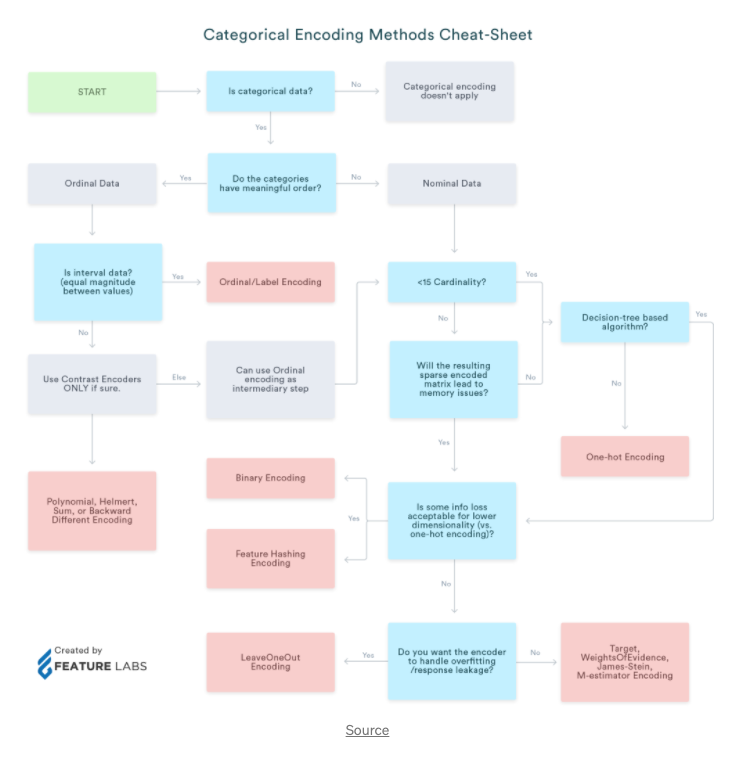